In [2]:


from DiffusionProject.Algorithms.Walks import QuantumWalk2D
from DiffusionProject.Algorithms.Walks import Backend
from DiffusionProject.Algorithms.Boundaries import Boundary
from DiffusionProject.Algorithms.Coins import HadamardCoin
from qiskit import QuantumRegister


In [1]:
BACKEND = Backend()
ctrl=HadamardCoin(1)
register = QuantumRegister(1,name = 'joe')


boundary_right_edge = Boundary("111",label="right_edge", dimension = 0,ctrl=ctrl, register=register)
boundary_top = Boundary("111",label="top", dimension= 1,ctrl=ctrl,register=register)
walk = QuantumWalk2D(BACKEND,[3,3],initial_states=["011","011"],coin_class=HadamardCoin, boundaries=[boundary_right_edge, boundary_top])
walk.step()


walk.draw_circuit("/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/Experiment_3_dims_3_qubits_Grover_coin/images/img.png")


NameError: name 'Backend' is not defined

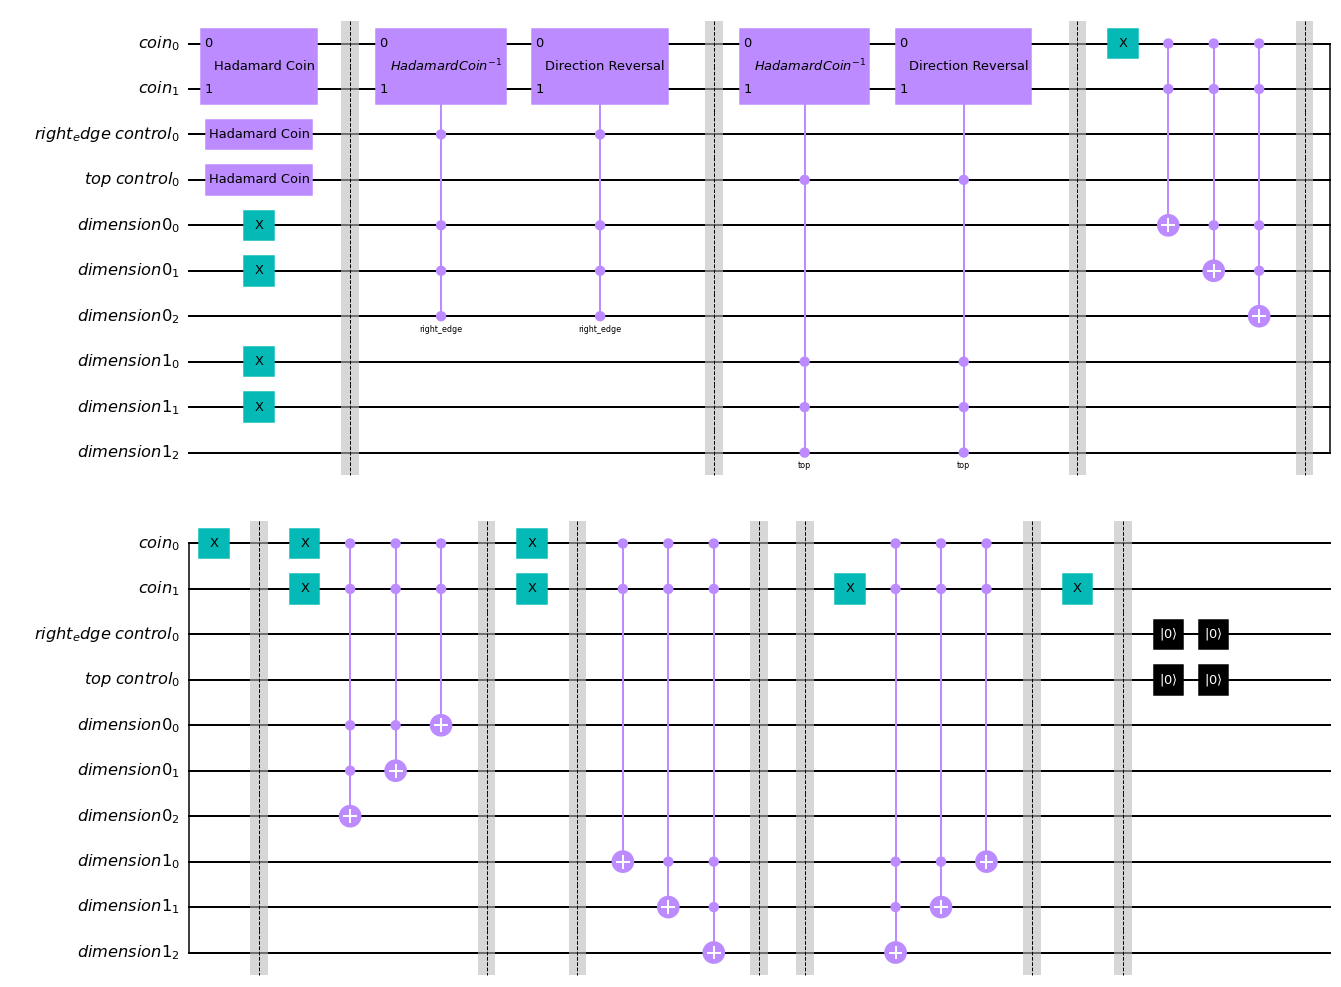

In [3]:
walk.quantum_circuit.draw('mpl')

In [4]:
from matplotlib import pyplot as plt

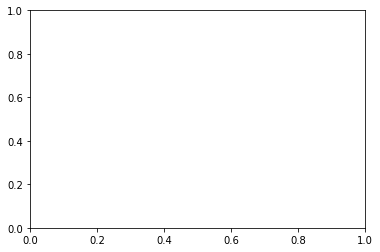

In [8]:
plt.cla()